## Train-Test Split Analysis

One final analysis would be to check how would the data distribution look like once we have split the dataset.

According to the paper, it was a 70/30 split

In [22]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [23]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,0,81.3479,2,20.0,NaN,158.27,0.63,218.30,28.37,714.92,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,546.93,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,689.44,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,622.01,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,1,73.9726,2,24.0,0.11,233.02,0.48,229.88,39.46,686.51,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [24]:
# Split dataset
from sklearn.model_selection import train_test_split

copy_dataset = dataset.copy()

X = copy_dataset.drop(columns = ["Diagnosis"])
y = copy_dataset["Diagnosis"]

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X, 
                                                    y, 
                                                    test_size = .30, 
                                                    random_state = 42,
)

X_train_vis.shape, X_test_vis.shape, y_train_vis.shape, y_test_vis.shape

((366, 22), (158, 22), (366,), (158,))

### Input feature analysis

Lets see how our data looks now after we split it

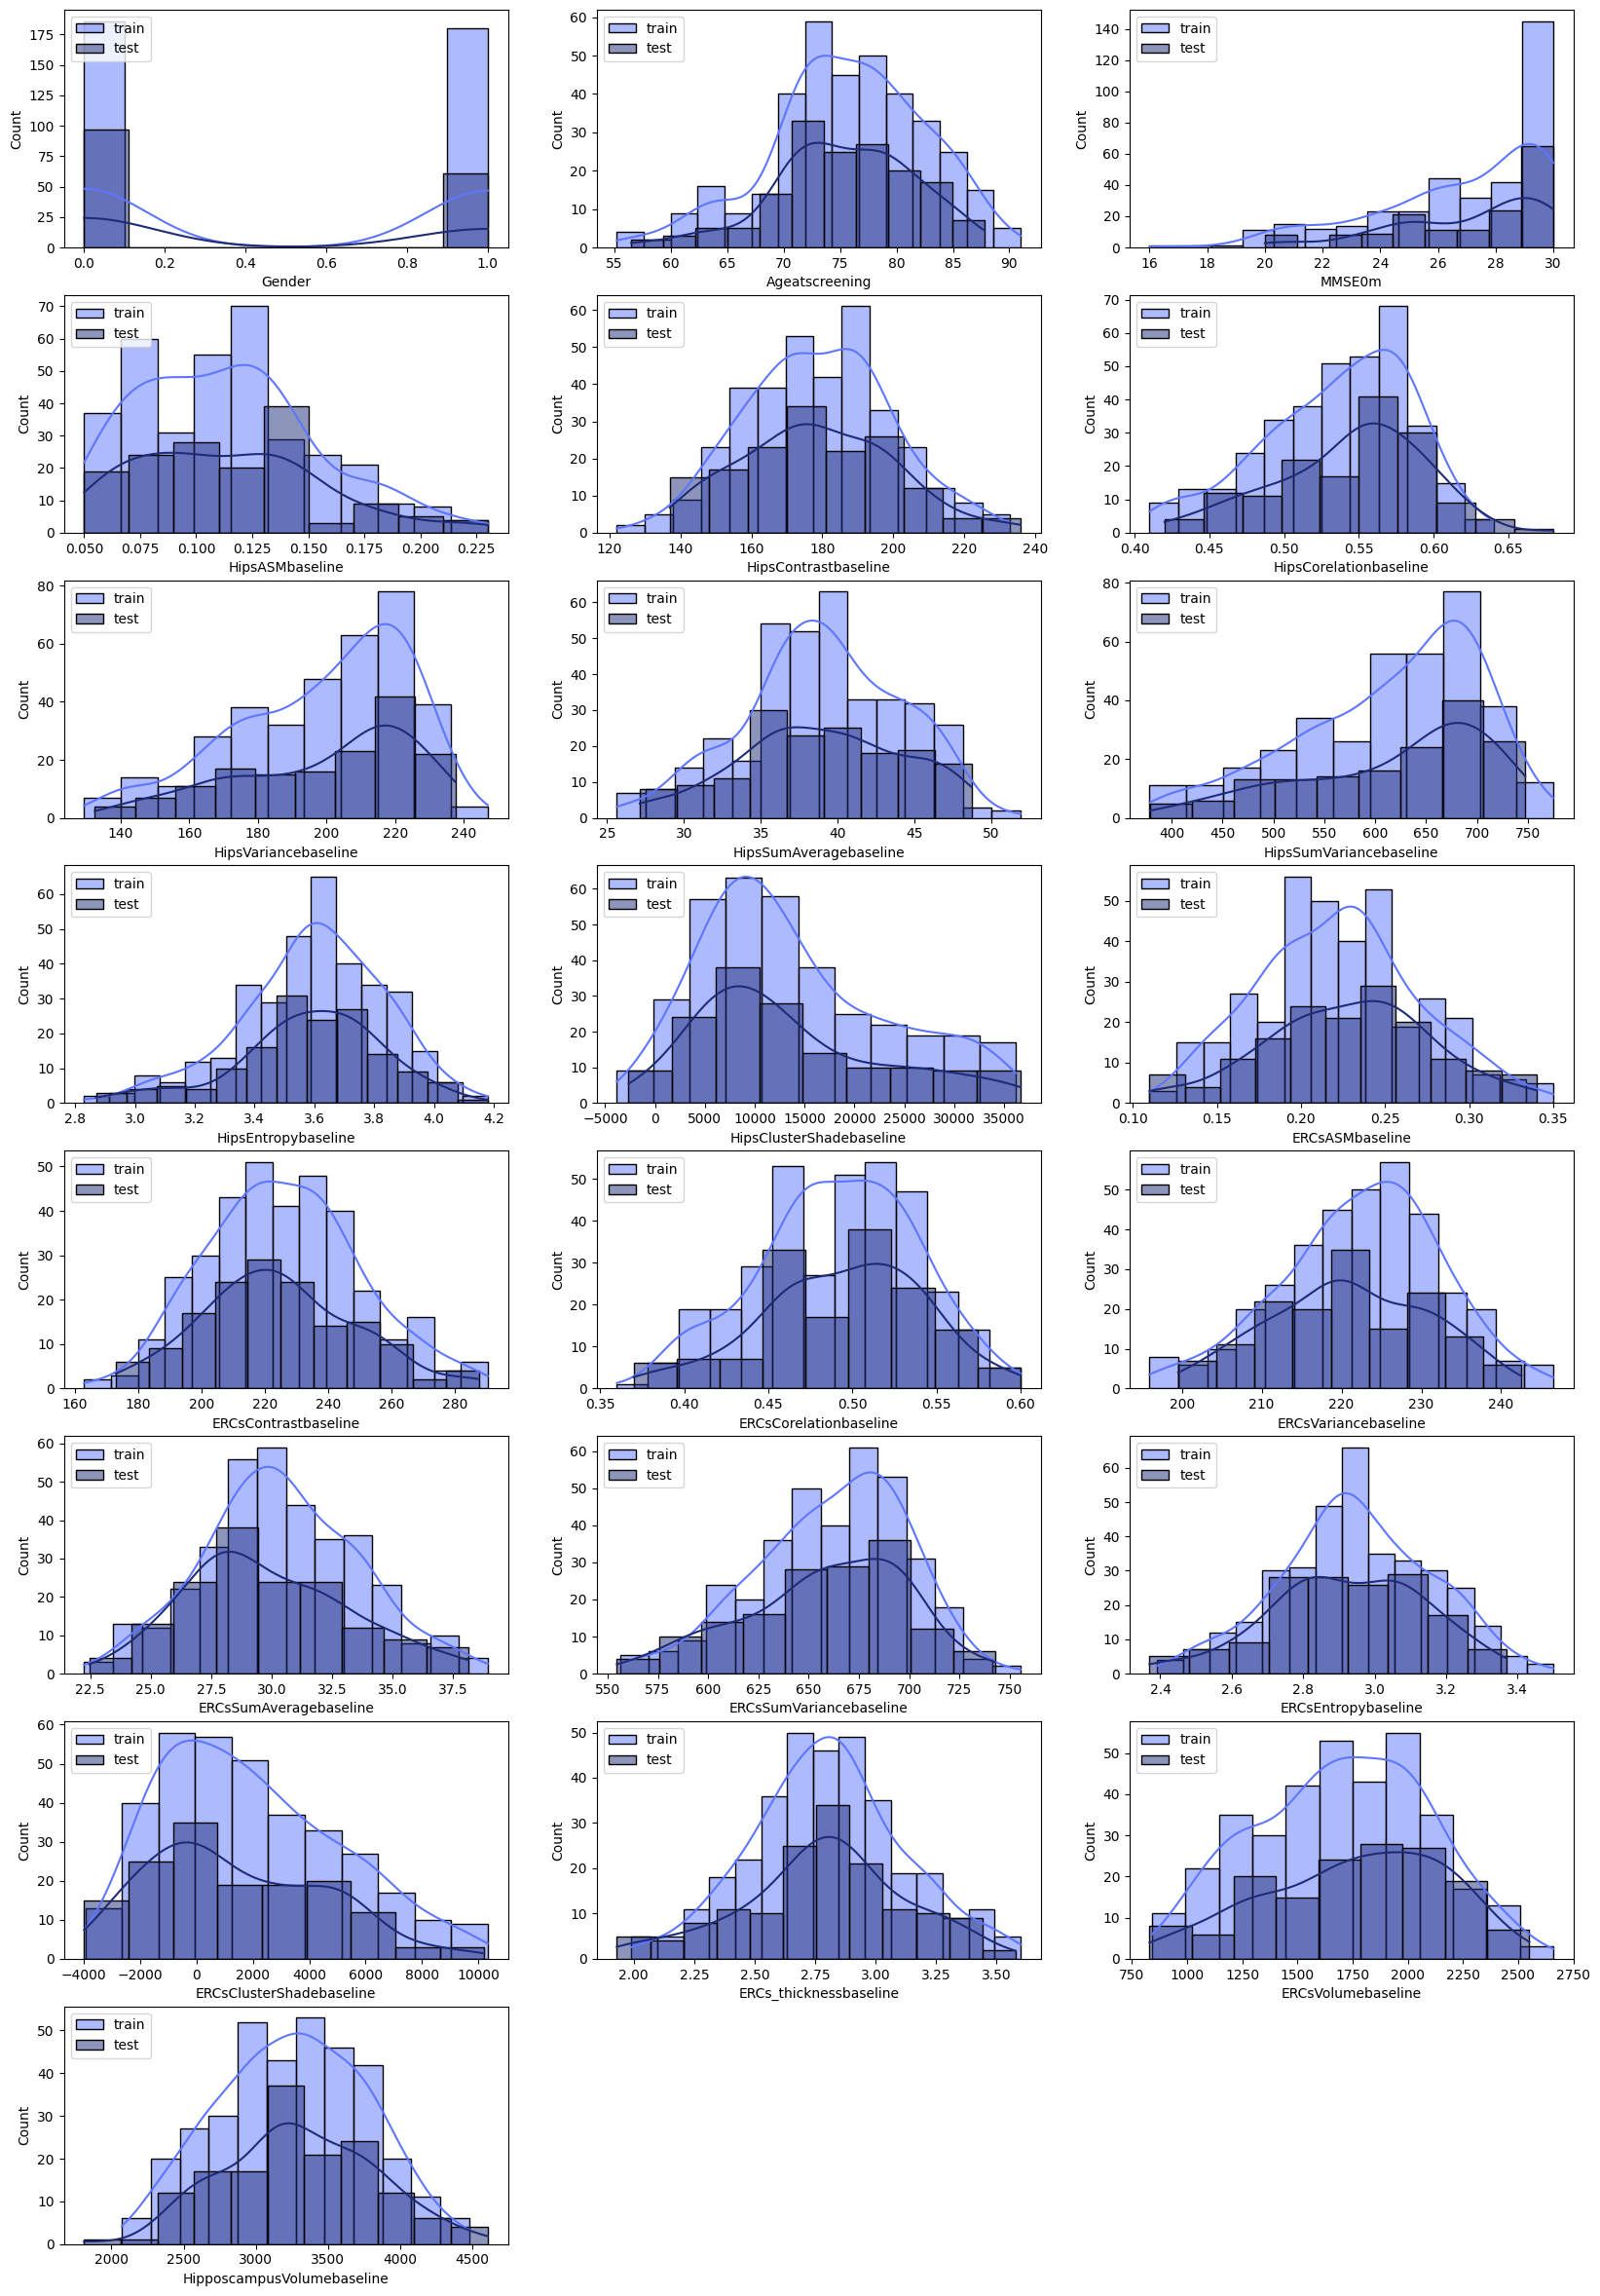

In [25]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_vis.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_vis[X_train_vis.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_vis[X_test_vis.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


It appears that some observations are included in the test set while other values are excluded in the training set. 

The last graph is a good example - notice from left to right. 

Lets have a closer look

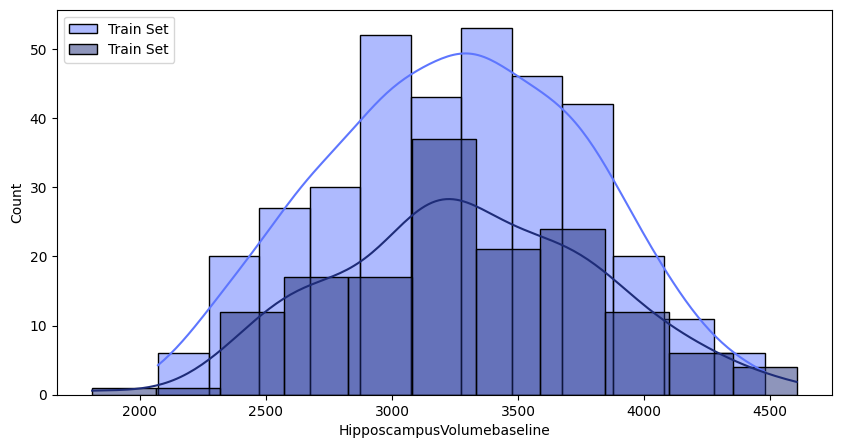

In [26]:
# Plot histogram of training/test set
plt.figure(figsize=(10, 5))

sns.histplot(X_train_vis["HipposcampusVolumebaseline"], color="#5e76fe", kde=True, label='Train Set', alpha=0.5)
sns.histplot(X_test_vis["HipposcampusVolumebaseline"], color="#1e2c78", kde=True, label='Train Set', alpha=0.5)
plt.legend(loc="upper left")

**This could be one of the few reasons why some of the models will underperform later on.**

Now lets check for the target split

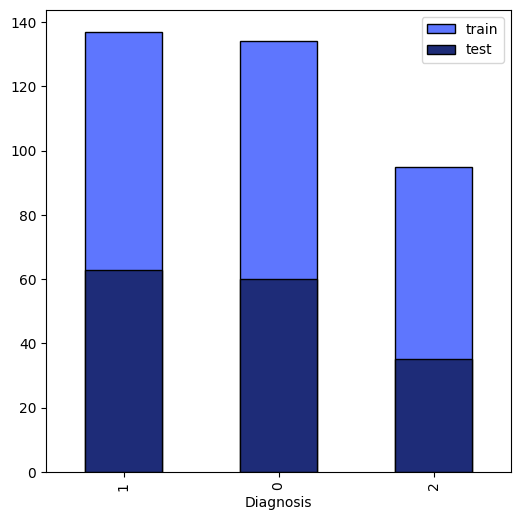

In [27]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train_vis.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test_vis.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")

In [28]:
y_train_vis.value_counts()

Diagnosis
1    137
0    134
2     95
Name: count, dtype: int64

In [29]:
y_test_vis.value_counts()

Diagnosis
1    63
0    60
2    35
Name: count, dtype: int64

### Removing null values

In [30]:
null_dataset = dataset.dropna()

In [31]:
X_train_vis_null, X_test_vis_null, y_train_vis_null, y_test_vis_null = train_test_split(null_dataset.drop(columns=["Diagnosis"]), 
                                                    null_dataset["Diagnosis"], 
                                                    test_size = .30, 
                                                    random_state = 42,
)

X_train_vis_null.shape, X_test_vis_null.shape, y_train_vis_null.shape, y_test_vis_null.shape

((270, 22), (116, 22), (270,), (116,))

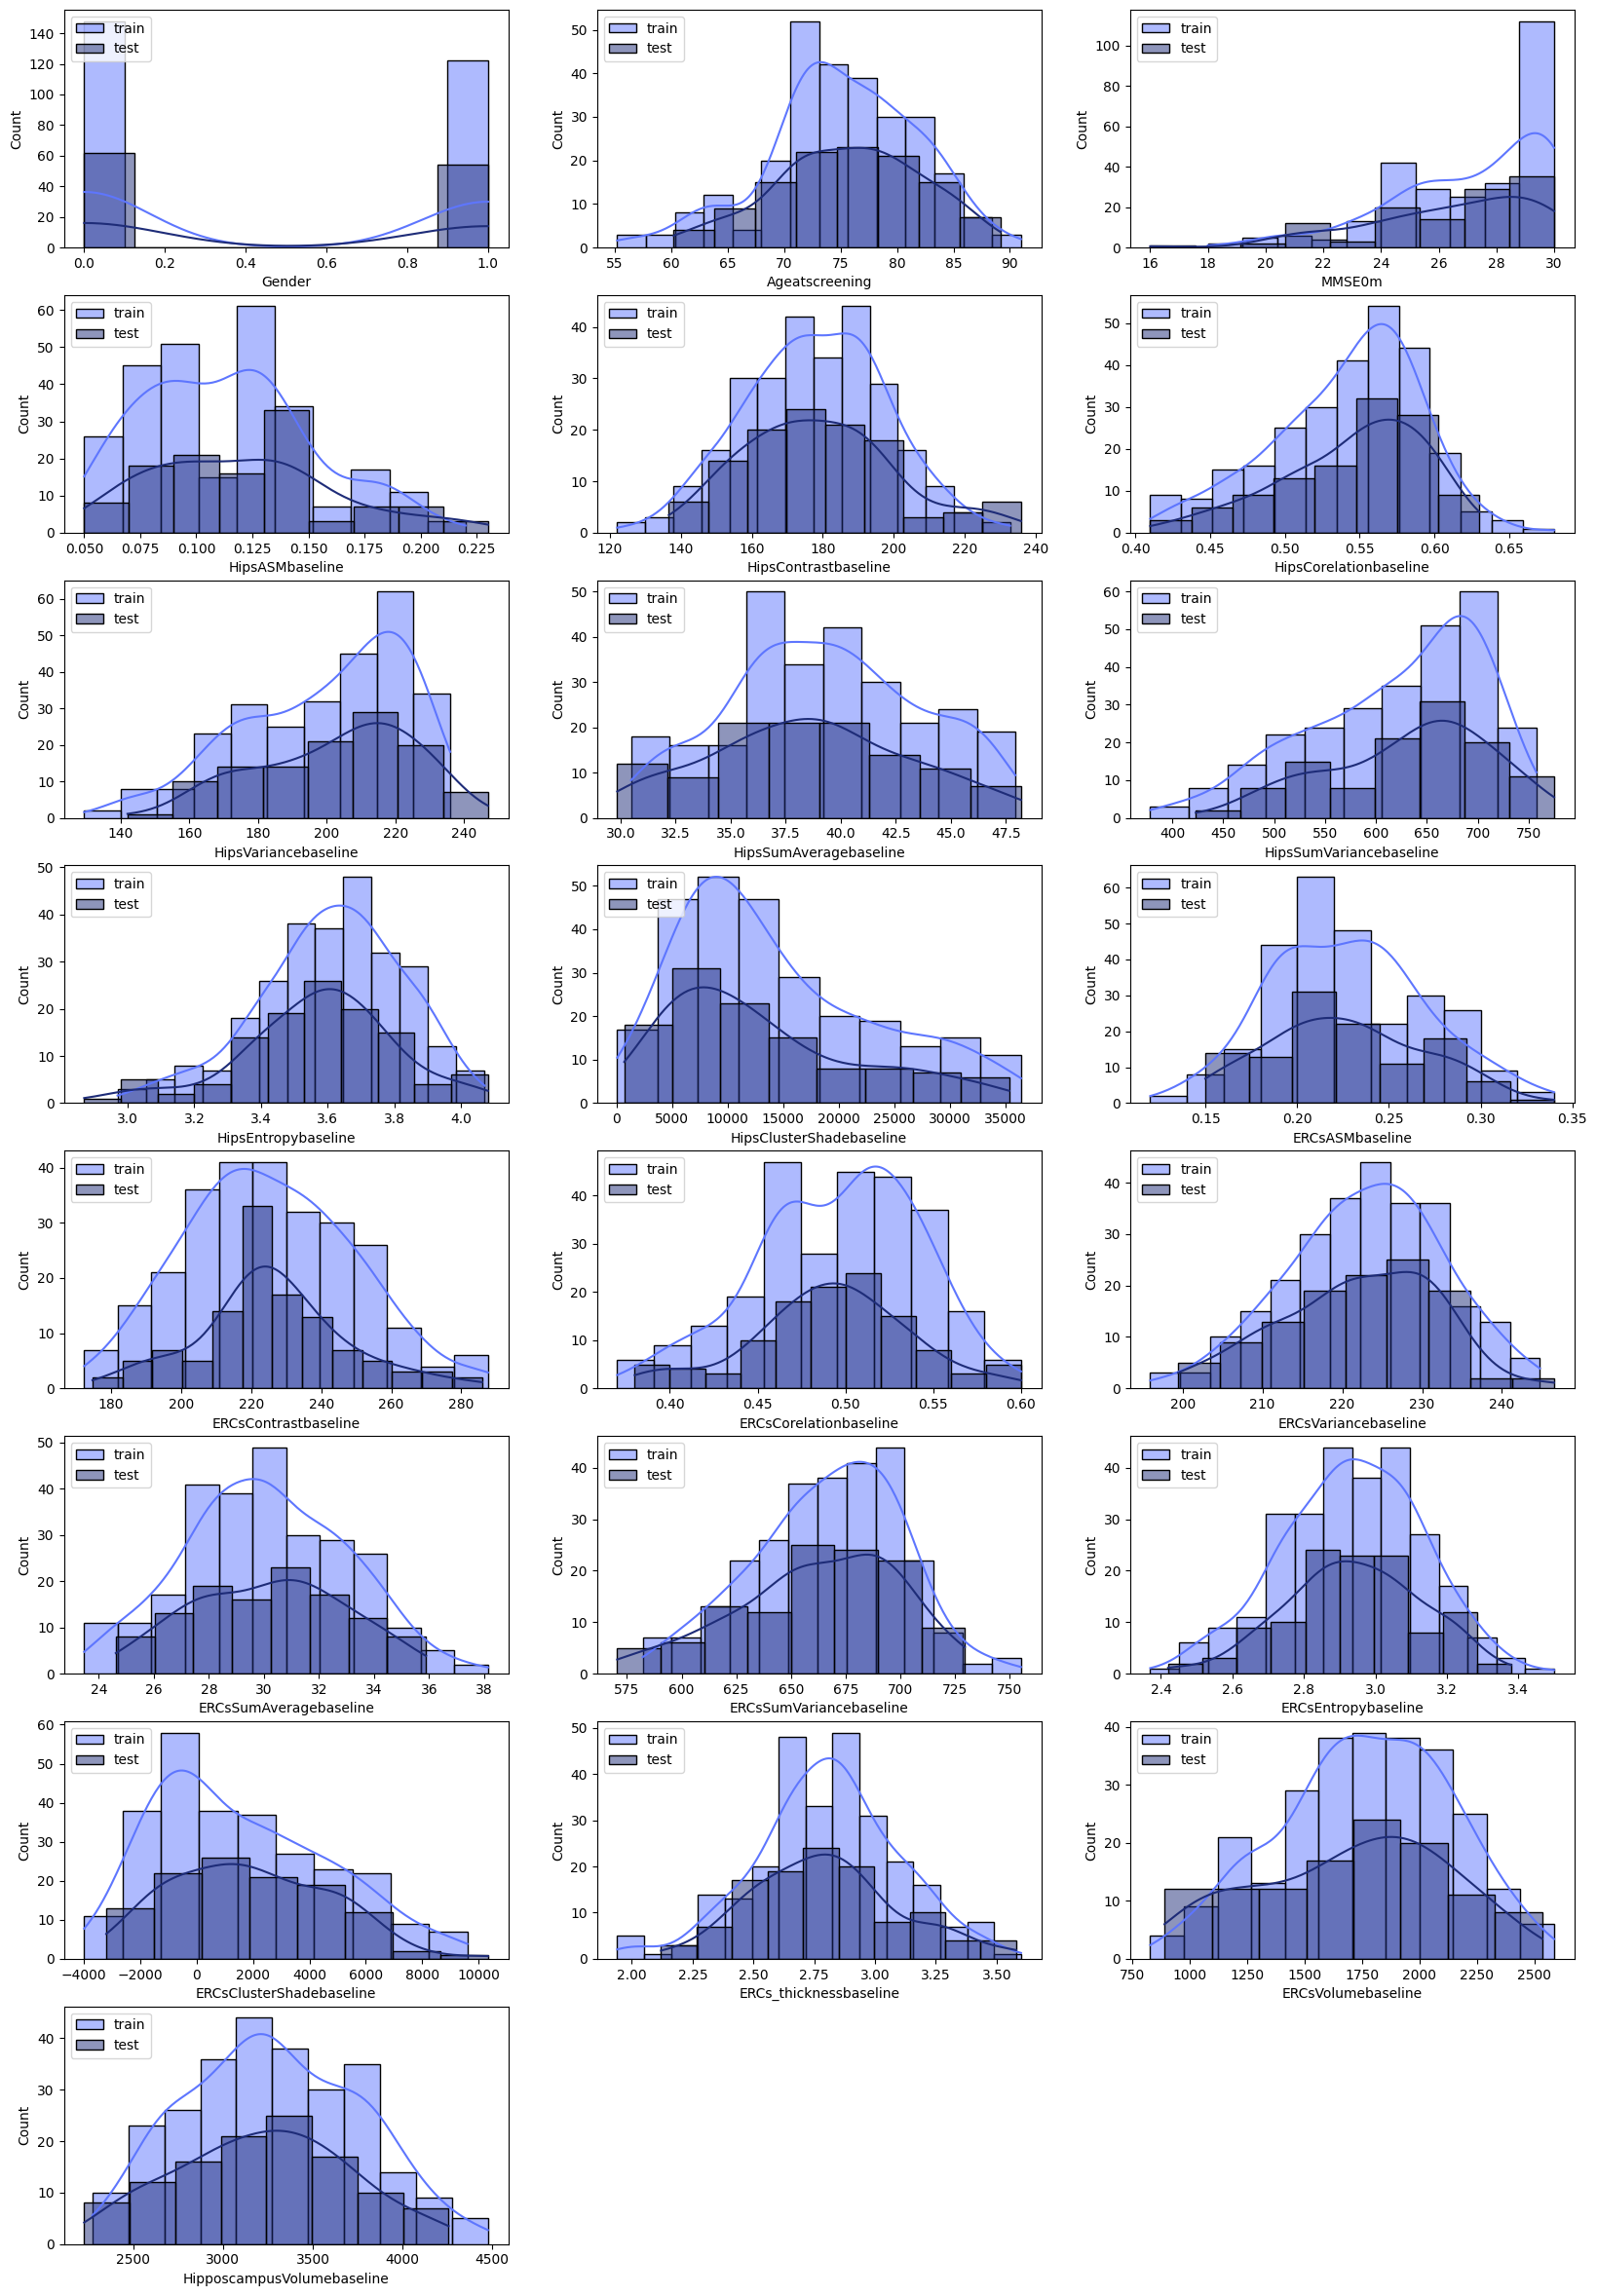

In [32]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_vis_null.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_vis_null[X_train_vis_null.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_vis_null[X_test_vis_null.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


In [33]:
y_train_vis_null.value_counts()

Diagnosis
1    117
0     93
2     60
Name: count, dtype: int64

In [34]:
y_test_vis_null.value_counts()

Diagnosis
1    45
0    37
2    34
Name: count, dtype: int64

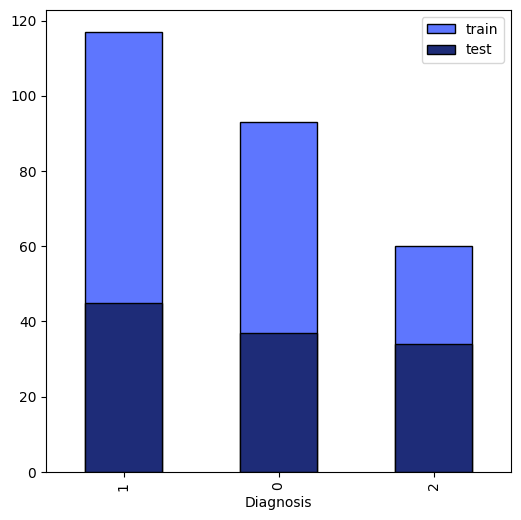

In [35]:
# Plot the target of training/test set using bar
plt.figure(figsize = (6,6))

y_train_vis_null.value_counts().plot(kind = "bar", 
                            color = "#5e76fe",
                            edgecolor = "black",
                            label="train",
)

y_test_vis_null.value_counts().plot(kind = "bar", 
                            color = "#1e2c78",
                            edgecolor = "black",
                            label="test",
)

plt.legend(loc="upper right")

### Group Seperation with Train-Test Split Analysis

In [36]:
group_zero = dataset[dataset["Diagnosis"]==0]
group_two = dataset[dataset["Diagnosis"]==2]
group_three = dataset[dataset["Diagnosis"]==3]

combined_group_one = pd.concat([group_zero, group_three])
combined_group_two = pd.concat([group_zero, group_two])

In [37]:
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(combined_group_one.drop(columns = ["Diagnosis"]),
                                                                    combined_group_one["Diagnosis"],
                                                                    test_size = .30, 
                                                                    random_state = 42,
)

X_train_one.shape, X_test_one.shape, y_train_one.shape, y_test_one.shape

((135, 22), (59, 22), (135,), (59,))

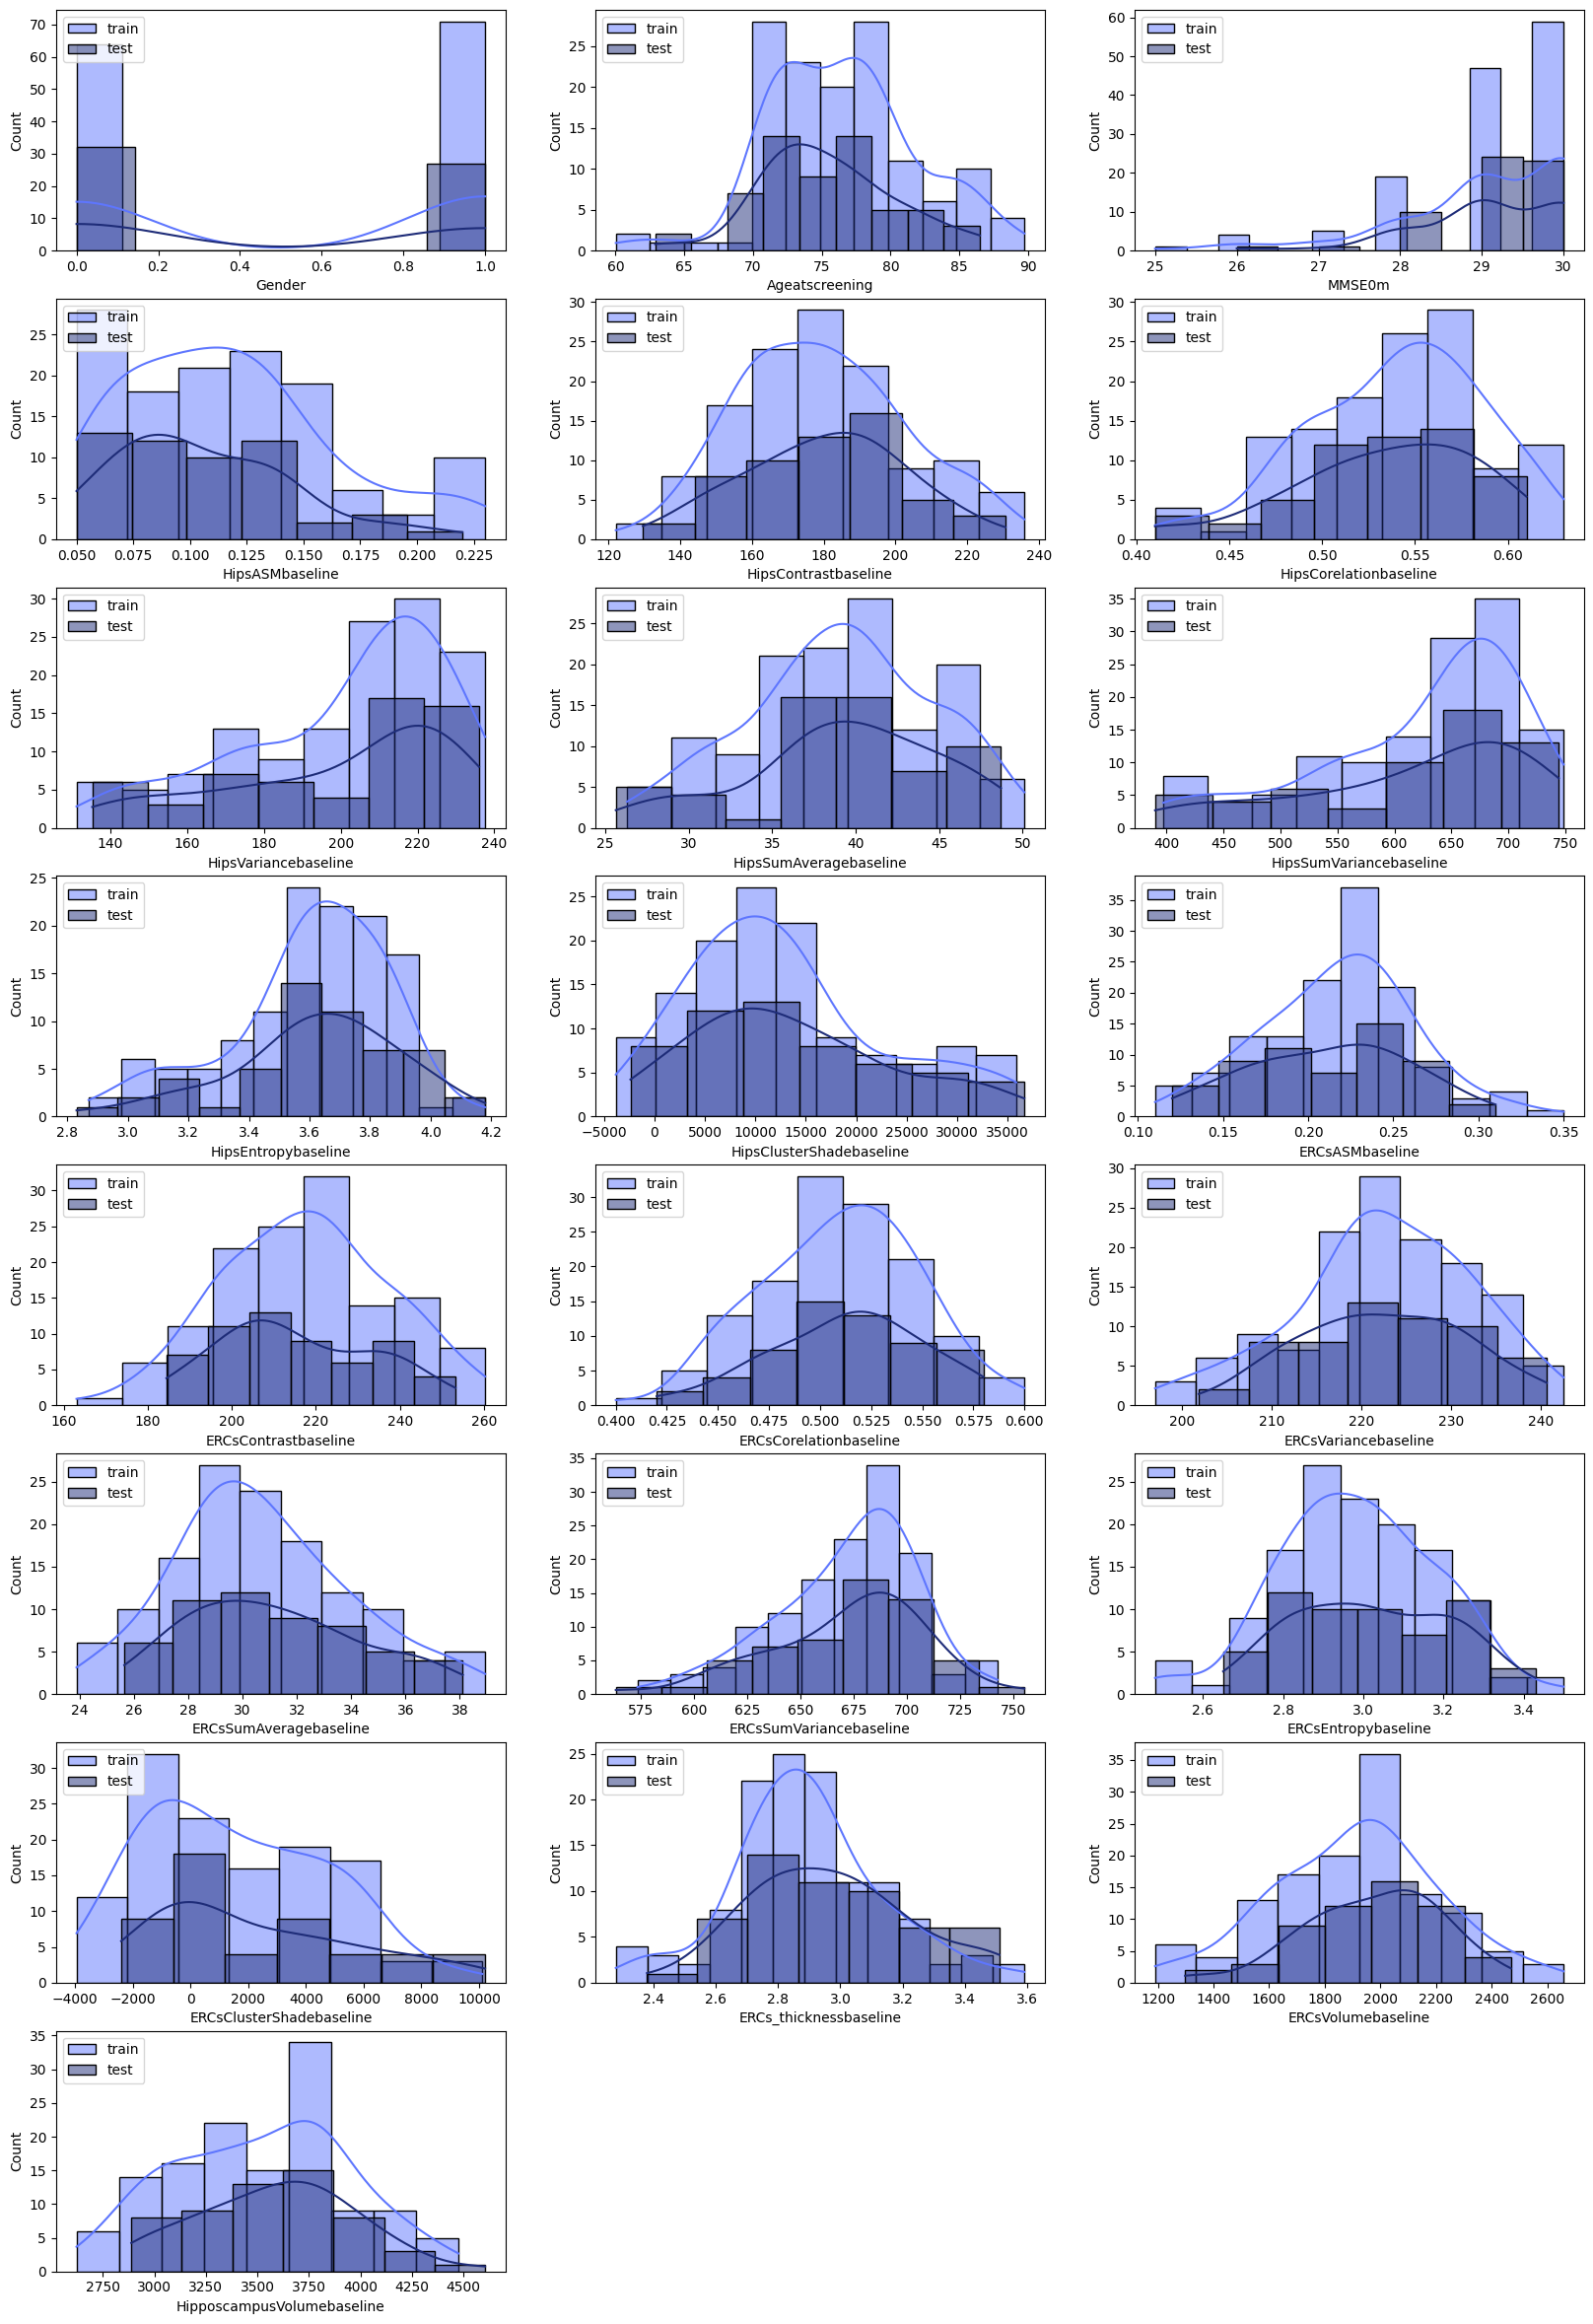

In [38]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))
for i in range(len(X_train_one.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_one[X_train_one.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_one[X_test_one.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


In [39]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(combined_group_two.drop(columns = ["Diagnosis"]),
                                                                    combined_group_two["Diagnosis"],
                                                                    test_size = .30, 
                                                                    random_state = 42,
)

X_train_two.shape, X_test_two.shape, y_train_two.shape, y_test_two.shape

((226, 22), (98, 22), (226,), (98,))

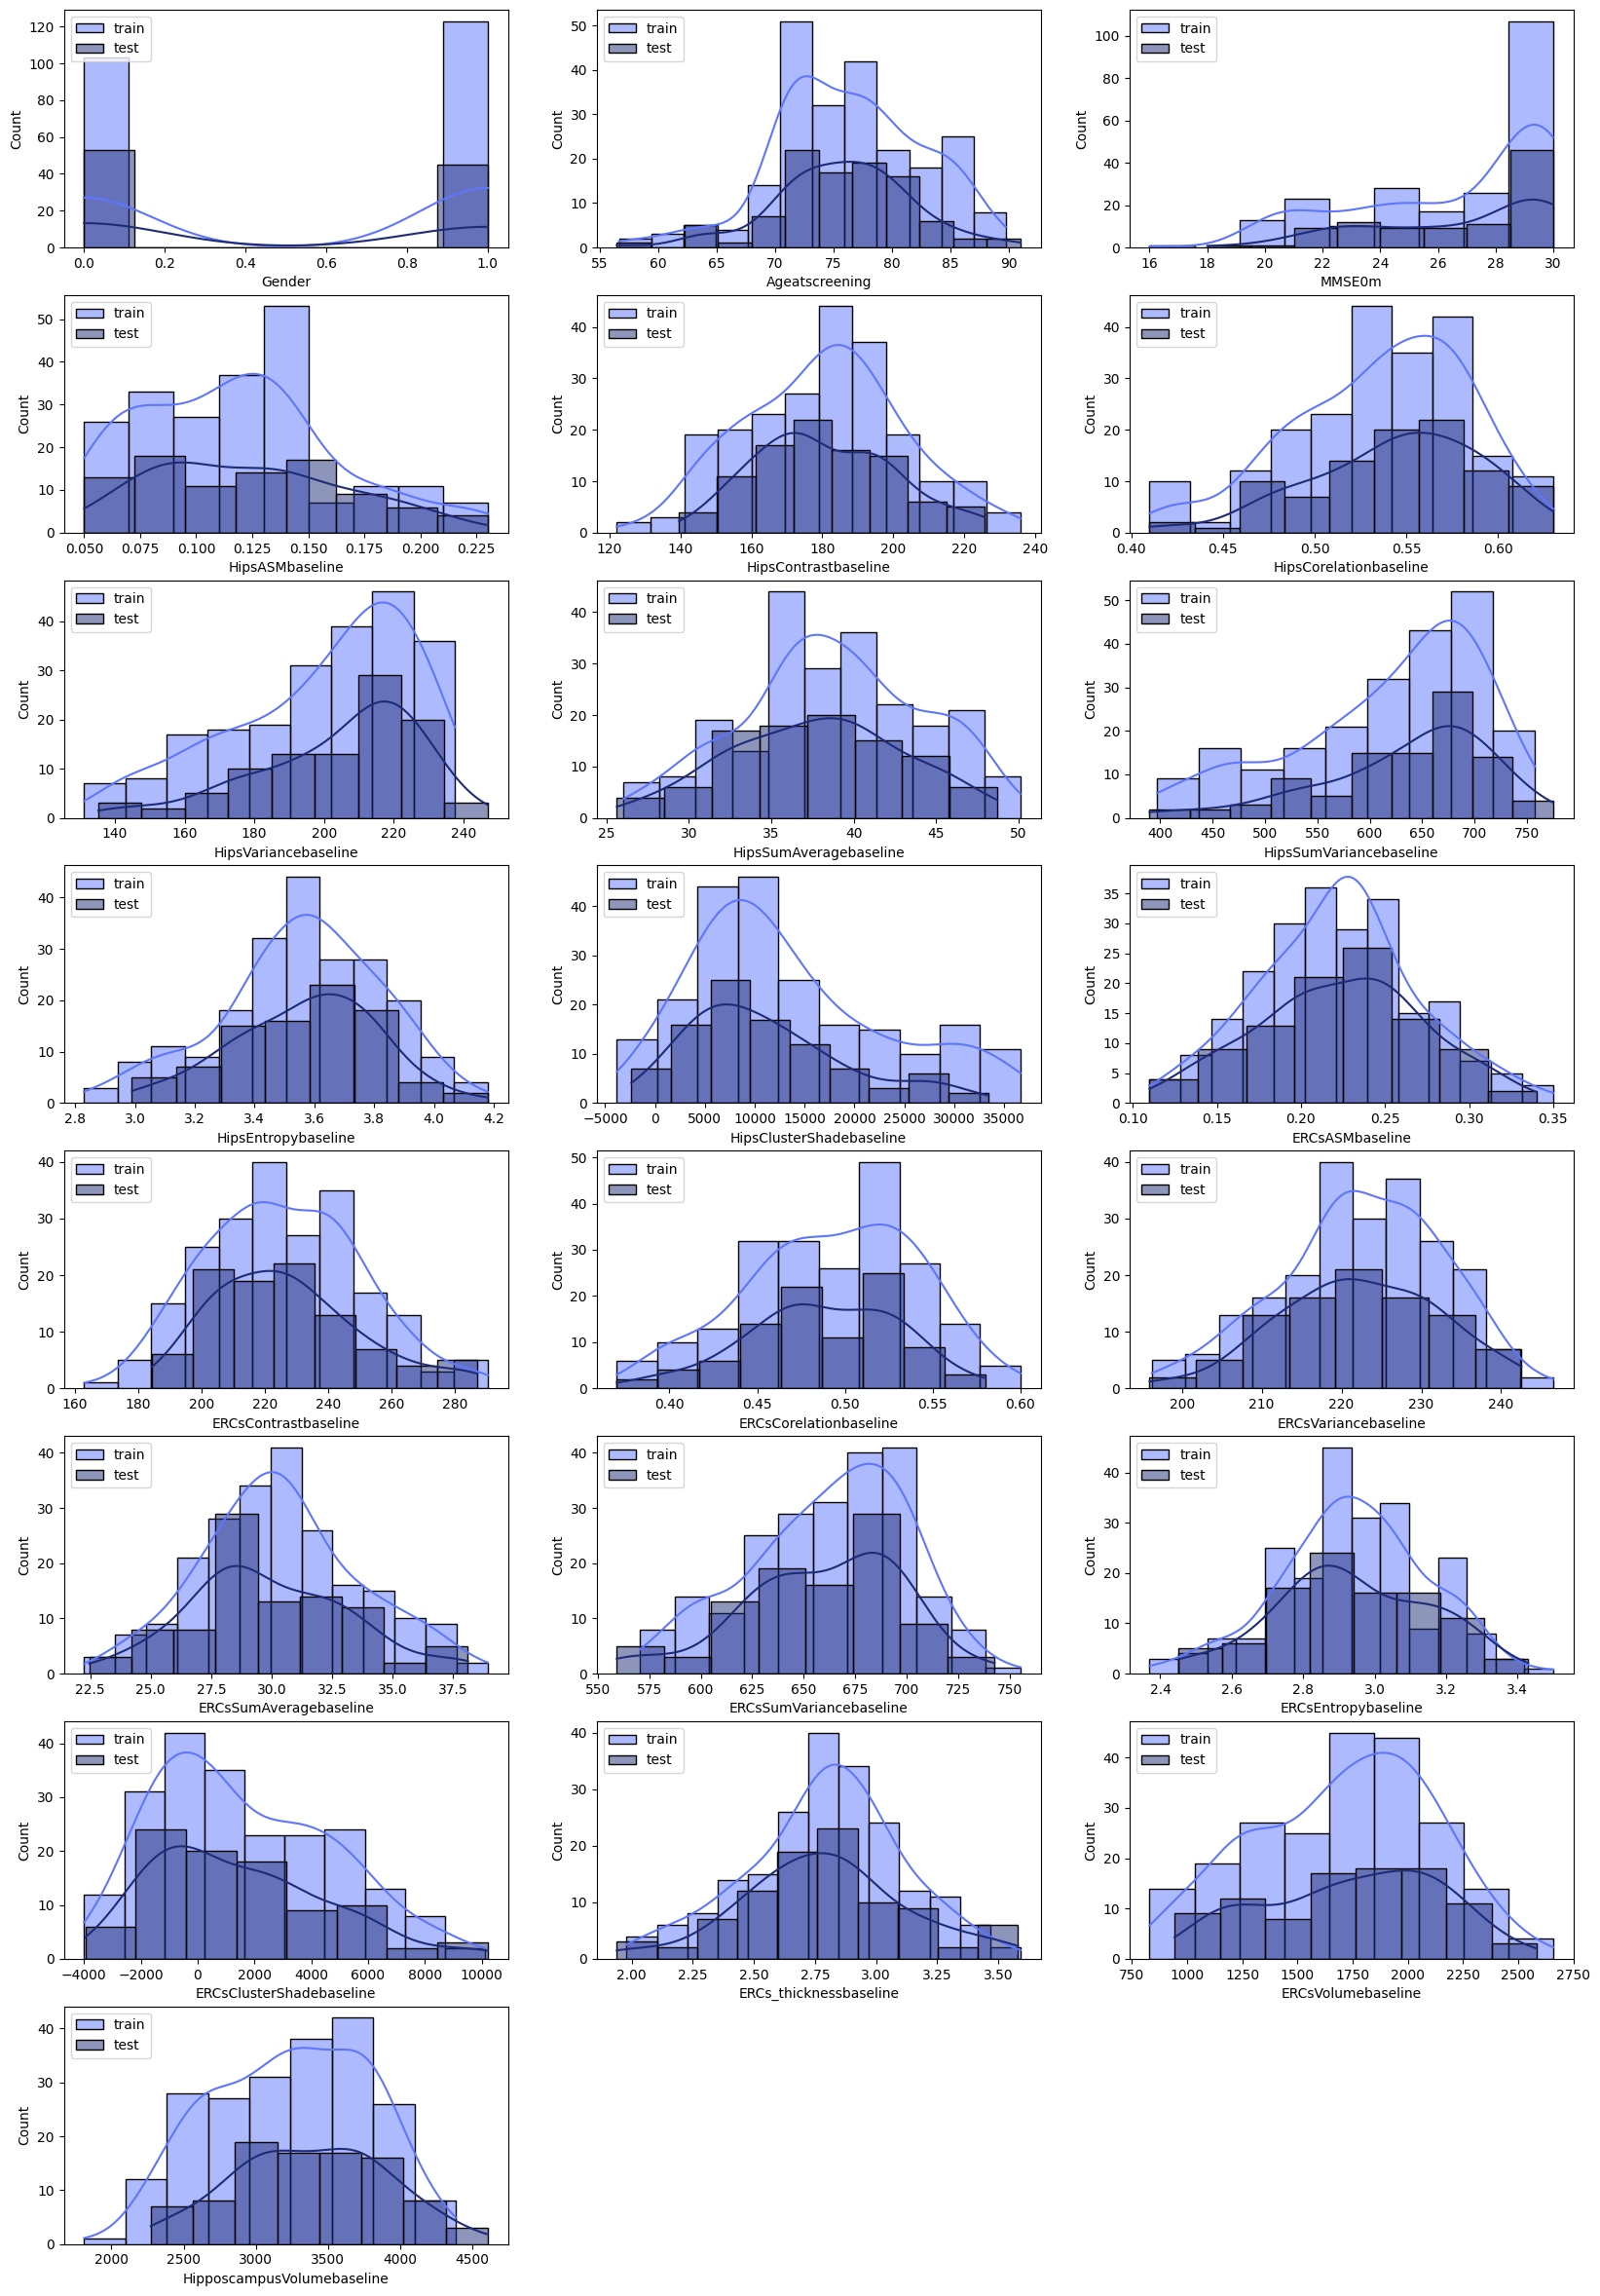

In [40]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_two.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(X_train_two[X_train_two.columns[i]], color="#5e76fe", kde = True, label="train")
    plt.legend(loc="upper left")


    plt.subplot(12,3,i+1)
    sns.histplot(X_test_two[X_test_two.columns[i]], color= "#1e2c78", kde = True, label="test")
    plt.legend(loc="upper left")


In [41]:
print("X_train Group one - 0 vs 3:")
print(X_train_one["DIAGNOSIS"].value_counts())

print("\nX_test Group one - 0 vs 3:")
print(X_test_one["DIAGNOSIS"].value_counts())

print("X_train Group two - 0 vs 2:")
print(X_train_two["DIAGNOSIS"].value_counts())

print("\nX_test Group two - 0 vs 2:")
print(X_test_two["DIAGNOSIS"].value_counts())

X_train Group one - 0 vs 3:


KeyError: 'DIAGNOSIS'

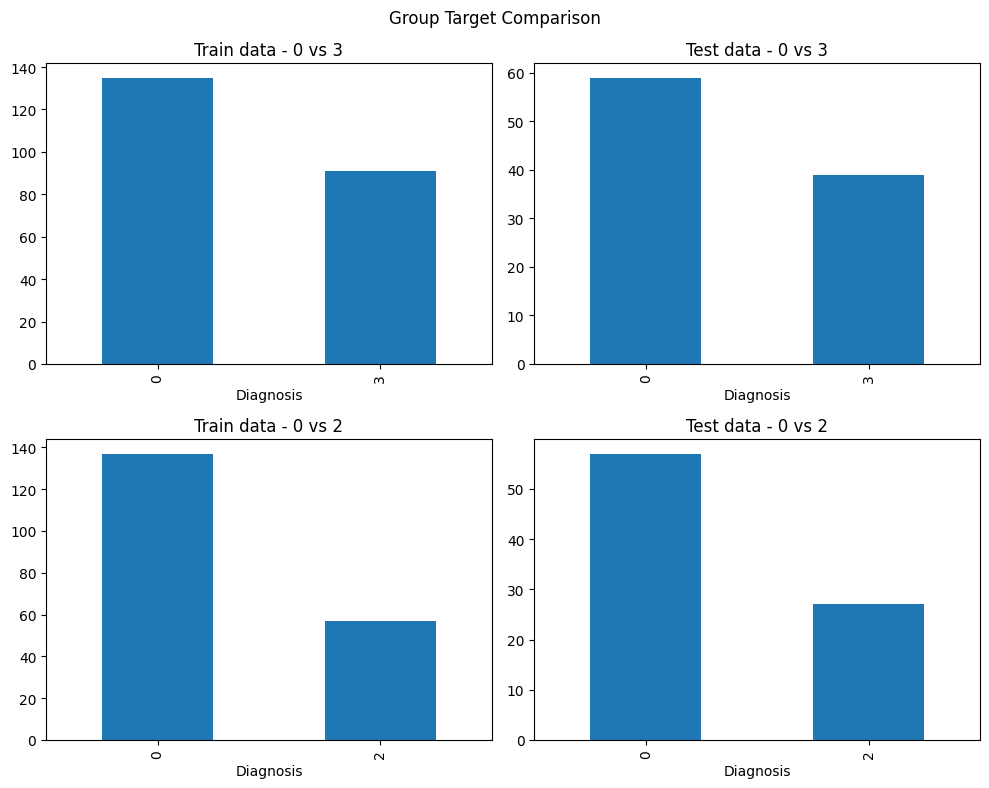

In [ ]:
plt.figure(figsize=(10,8))
plt.suptitle("Group Target Comparison")

plt.subplot(2, 2, 1)
X_train_one["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Train data - 0 vs 3")

plt.subplot(2, 2, 2)
X_test_one["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Test data - 0 vs 3")

plt.subplot(2, 2, 3)
X_train_two["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Train data - 0 vs 2")

plt.subplot(2, 2, 4)
X_test_two["Diagnosis"].value_counts().plot(kind='bar')
plt.title("Test data - 0 vs 2")

plt.tight_layout()  
plt.show()